<p style="font-size:35px">Importing Dependencies And Dataset</p>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("Loan_default.csv")
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [3]:
loan_data = df.drop("LoanID",axis=1)
loan_data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


<p style="font-size:35px">Basic Information Analysis</p>

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [6]:
loan_data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [7]:
#  Lets check for null values
loan_data.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
#  Lets check categorical columns
categorical_columns = loan_data.select_dtypes('object').columns
categorical_columns

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [9]:
#  Lets check integer columns
integer_columns = loan_data.select_dtypes('int').columns
integer_columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'LoanTerm', 'Default'],
      dtype='object')

In [10]:
#  Lets check floating point columns
float_columns = loan_data.select_dtypes('float').columns
float_columns

Index(['InterestRate', 'DTIRatio'], dtype='object')

In [11]:
for cat_cols in categorical_columns:
    print(f'{cat_cols}:')
    print(loan_data[cat_cols].value_counts())
    print("\n")

Education:
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64


EmploymentType:
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64


MaritalStatus:
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64


HasMortgage:
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64


HasDependents:
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64


LoanPurpose:
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64


HasCoSigner:
HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64




In [12]:
for int_cols in integer_columns:
    print(f'{int_cols}:')
    print(loan_data[int_cols].value_counts())
    print("\n")

Age:
Age
55    5064
40    5056
65    5027
33    5022
53    5010
62    4999
34    4987
45    4985
61    4982
39    4973
22    4970
32    4969
43    4965
19    4963
35    4961
68    4958
38    4955
30    4954
49    4952
50    4949
27    4945
47    4931
57    4925
54    4921
31    4908
44    4906
36    4906
28    4906
56    4902
26    4891
21    4889
46    4887
18    4884
58    4883
67    4876
51    4876
59    4871
24    4869
29    4865
63    4862
20    4861
37    4856
66    4841
25    4840
64    4840
69    4817
41    4815
48    4810
42    4803
60    4772
52    4748
23    4740
Name: count, dtype: int64


Income:
Income
69492     10
117102    10
121985    10
85375      9
61315      9
          ..
98969      1
72350      1
126600     1
68356      1
124446     1
Name: count, Length: 114620, dtype: int64


LoanAmount:
LoanAmount
133724    8
221949    8
95419     8
235258    7
108323    7
         ..
121259    1
147115    1
166792    1
39044     1
208294    1
Name: count, Length: 158729, dtype

In [13]:
for float_cols in float_columns:
    print(f'{float_cols}:')
    print(loan_data[float_cols].value_counts())
    print("\n")

InterestRate:
InterestRate
14.92    147
2.25     144
4.78     140
16.44    140
7.30     139
        ... 
15.50     83
4.58      82
14.34     81
25.00     53
2.00      44
Name: count, Length: 2301, dtype: int64


DTIRatio:
DTIRatio
0.67    3385
0.64    3308
0.37    3288
0.13    3285
0.19    3285
        ... 
0.68    3078
0.35    3068
0.11    3051
0.10    1611
0.90    1605
Name: count, Length: 81, dtype: int64




In [14]:
#  Lets check if any duplicates present
loan_data.duplicated().sum()

0

<p style="font-size:35px">Exploratory Data Analysis</p>

<Axes: >

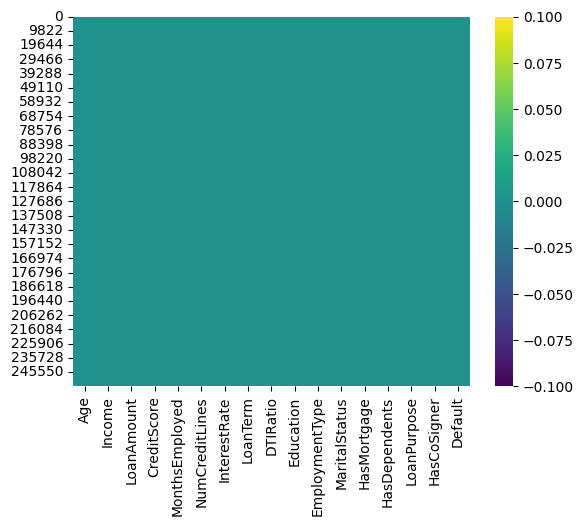

In [16]:
#  Checking missing values
sns.heatmap(loan_data.isnull(),cmap='viridis')

Text(0.5, 1.0, 'Output Labels')

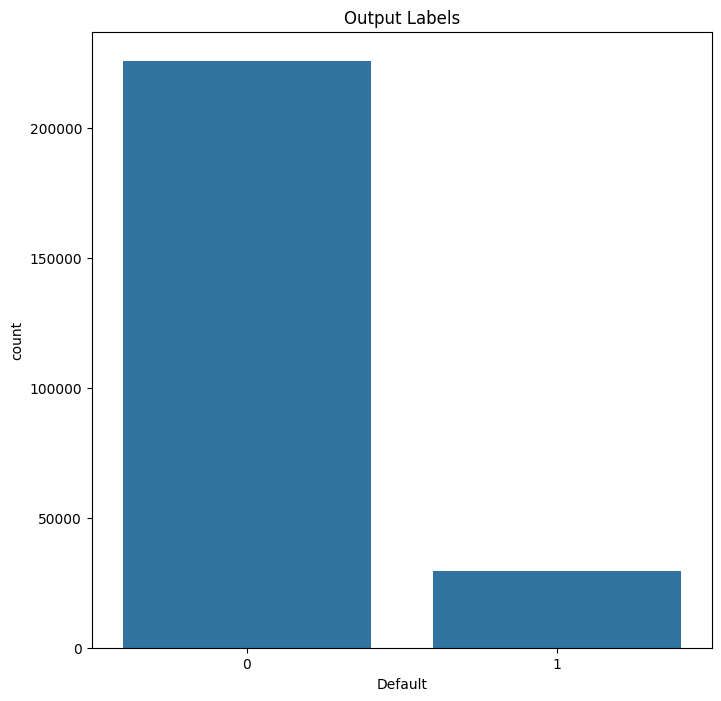

In [17]:
# Lets check if target is balanced
plt.figure(figsize=(8,8))
sns.countplot(x='Default',data=loan_data)
plt.title("Output Labels")

<Axes: >

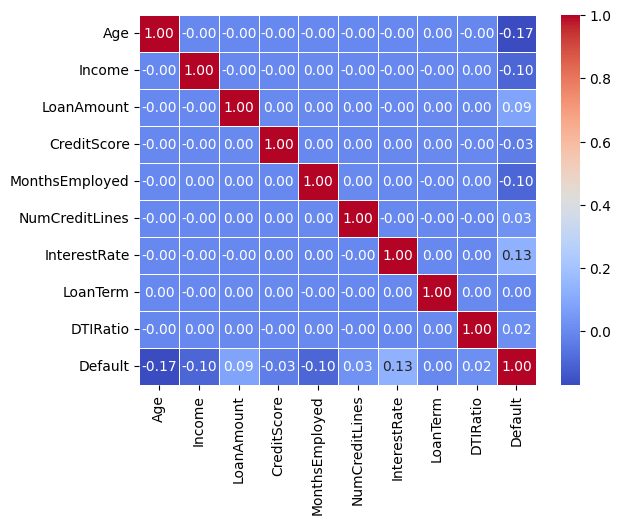

In [18]:
#  Plot heatmap to know correlation
corr_columns = loan_data.select_dtypes(include=['int64','float64'])
sns.heatmap(corr_columns.corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)


Text(0.5, 1.0, 'Box Plot Of Age')

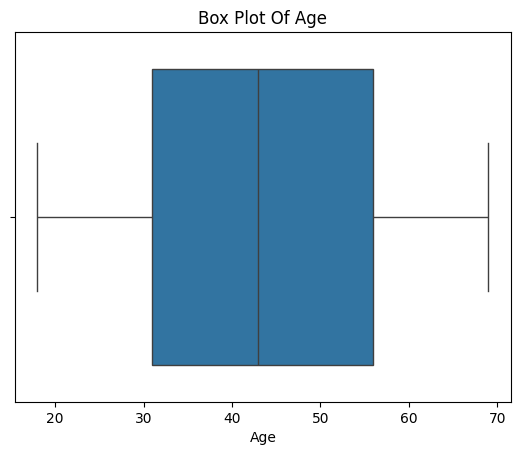

In [19]:
sns.boxplot(x=loan_data['Age'])
plt.title("Box Plot Of Age")

Text(0.5, 1.0, 'Box Plot Of Income')

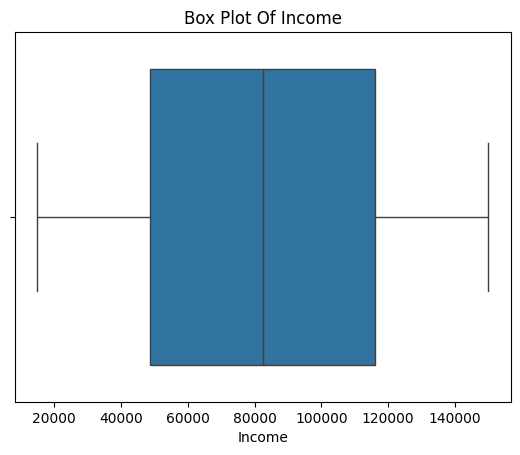

In [20]:
sns.boxplot(x=loan_data['Income'])
plt.title("Box Plot Of Income")

Text(0.5, 1.0, 'Box Plot Of Loan Amount')

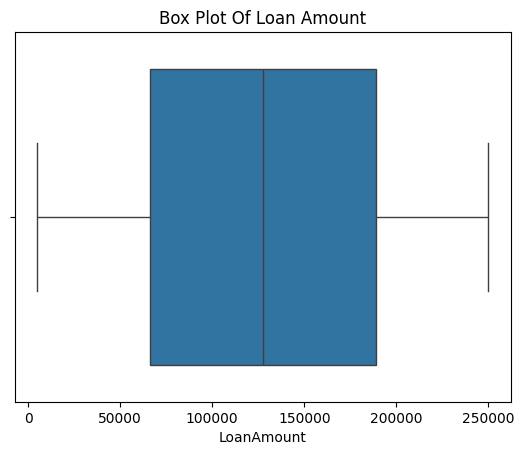

In [21]:
sns.boxplot(x=loan_data['LoanAmount'])
plt.title("Box Plot Of Loan Amount")

Text(0.5, 1.0, 'Box Plot Of Credit Score')

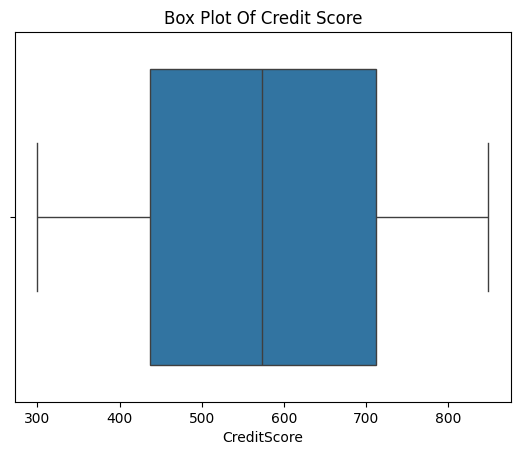

In [22]:
sns.boxplot(x=loan_data['CreditScore'])
plt.title("Box Plot Of Credit Score")

Text(0.5, 1.0, 'Box Plot Of Months Employed')

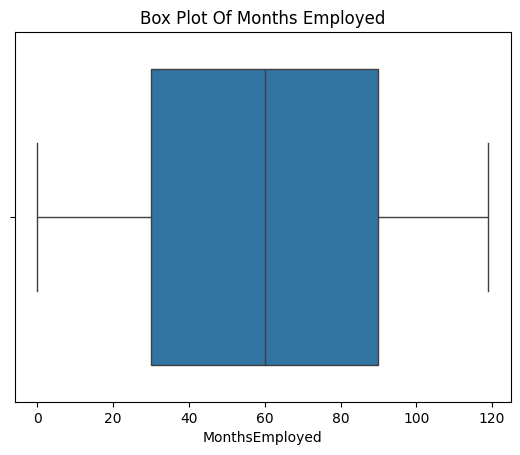

In [23]:
sns.boxplot(x=loan_data['MonthsEmployed'])
plt.title("Box Plot Of Months Employed")

Text(0.5, 1.0, 'Box Plot Of NumCreditLines')

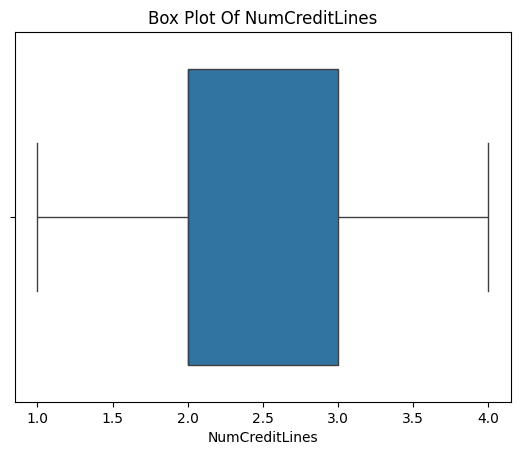

In [24]:
sns.boxplot(x=loan_data['NumCreditLines'])
plt.title("Box Plot Of NumCreditLines")

Text(0.5, 1.0, 'Box Plot Of Loan Term')

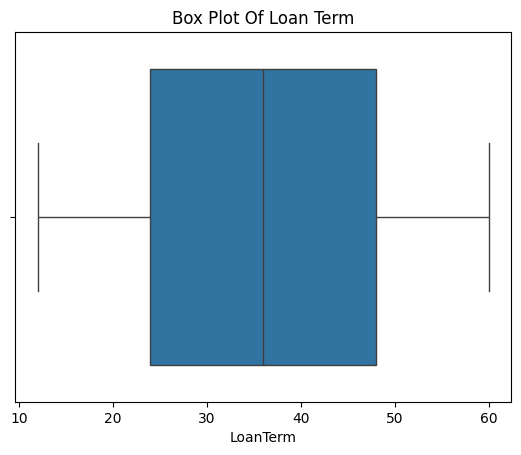

In [25]:
sns.boxplot(x=loan_data['LoanTerm'])
plt.title("Box Plot Of Loan Term")

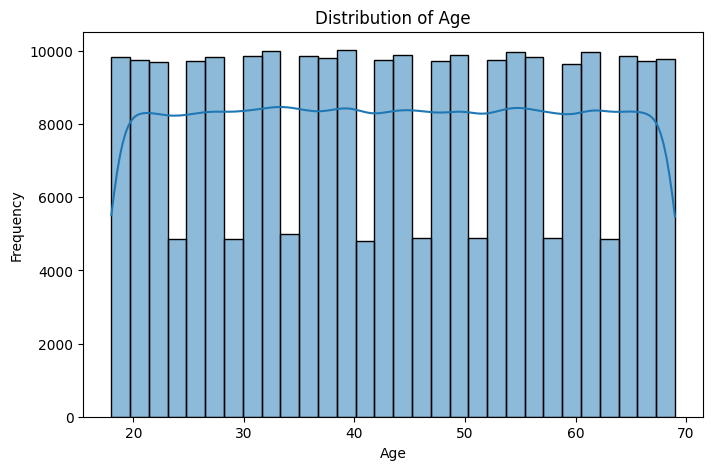

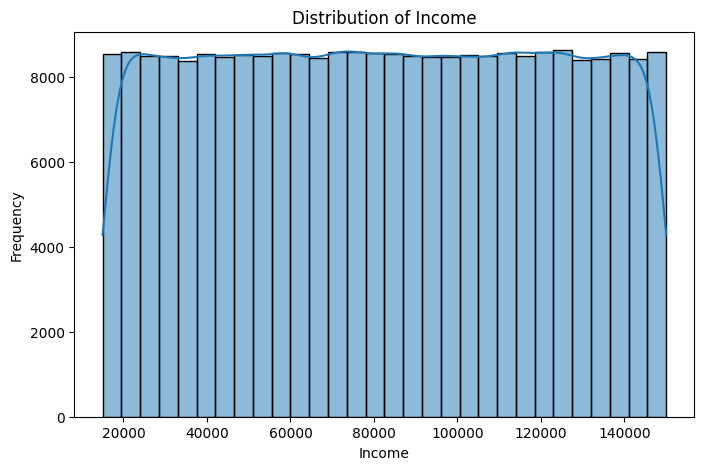

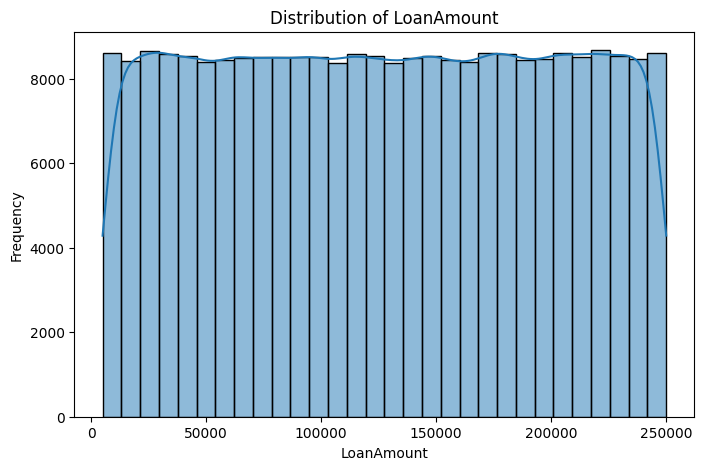

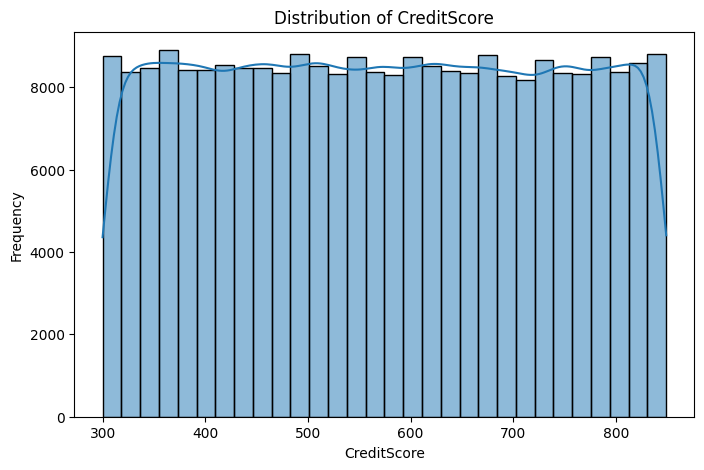

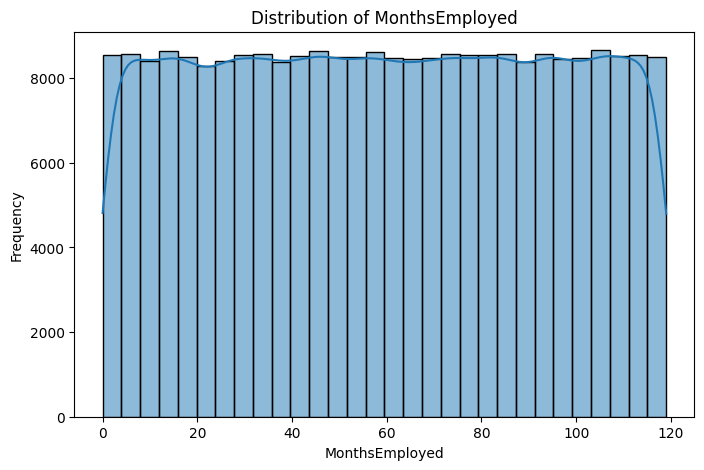

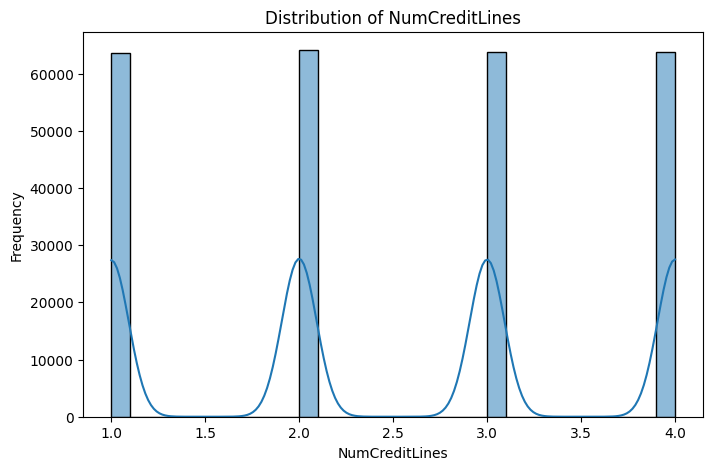

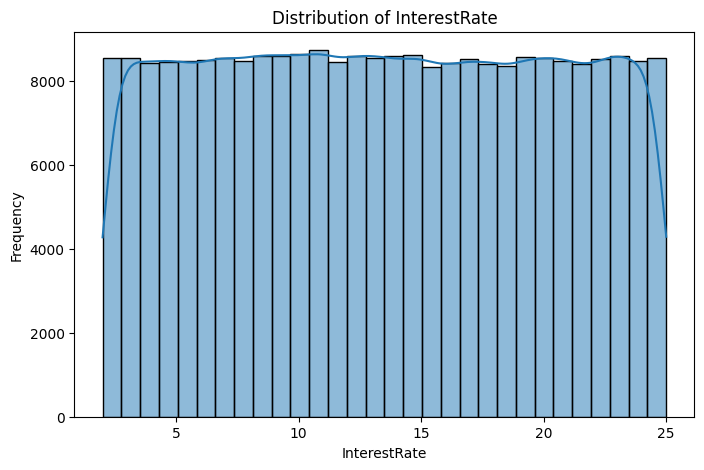

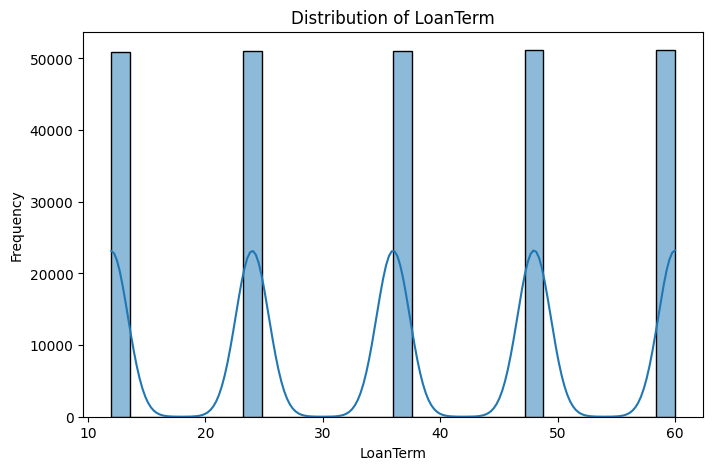

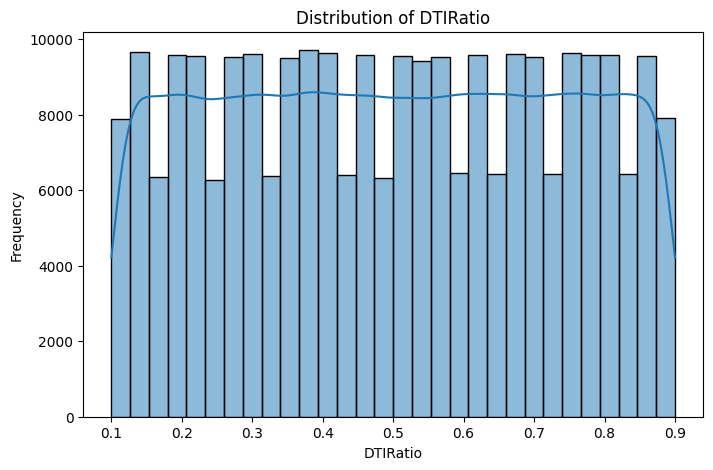

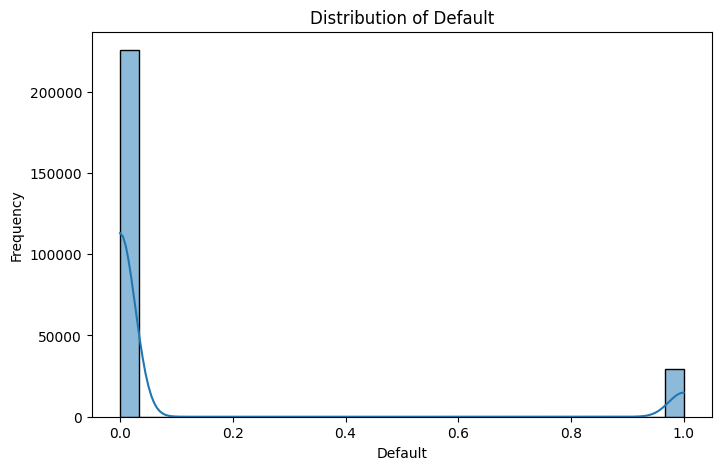

In [26]:

numerical_cols = loan_data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(loan_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<p style="font-size:35px">Data Splitting</p>

In [28]:
X = loan_data.drop('Default',axis=1)

In [29]:
y = loan_data['Default']

In [30]:
X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No


In [31]:
y

0         0
1         0
2         1
3         0
4         0
         ..
255342    0
255343    1
255344    0
255345    0
255346    0
Name: Default, Length: 255347, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(178742, 16) (76605, 16) (178742,) (76605,)


<p style="font-size:35px">Data Preprocessing</p>

In [35]:
#  Converting text data to lowercase
for col in categorical_columns:
    X_train[col] = X_train[col].str.lower()

In [36]:
#  Converting text data to lowercase
for col in categorical_columns:
    X_test[col] = X_test[col].str.lower()

In [37]:
#  Removing the special characters from the features
import re

def clean_text(text):
    if isinstance(text, str):
        return re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text  

In [38]:
#  Applying the function to train and test data
X_train['Education'] = X_train['Education'].apply(clean_text)
X_test['Education'] = X_test['Education'].apply(clean_text)

In [39]:
categorical_columns

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [40]:
#  Performing the encoding for categorical features

from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
OHE = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')

In [41]:
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 
                       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Fit on X_train categorical data only
OHE.fit(X_train[categorical_columns])

# Transform X_train
X_train_encoded = pd.DataFrame(
    OHE.transform(X_train[categorical_columns]),
    columns=OHE.get_feature_names_out(categorical_columns),
    index=X_train.index
)

In [42]:
# Transform X_test using the same encoder
X_test_encoded = pd.DataFrame(
    OHE.transform(X_test[categorical_columns]),
    columns=OHE.get_feature_names_out(categorical_columns),
    index=X_test.index
)

In [43]:
# Drop categorical columns from X_train and X_test
X_train_num = X_train.drop(categorical_columns, axis=1).reset_index(drop=True)
X_test_num = X_test.drop(categorical_columns, axis=1).reset_index(drop=True)

In [44]:
# Reset index to align concatenation
X_train_encoded.reset_index(drop=True, inplace=True)
X_test_encoded.reset_index(drop=True, inplace=True)

In [45]:
# Combine numerical and encoded categorical features
X_train_processed = pd.concat([X_train_num, X_train_encoded], axis=1)
X_test_processed = pd.concat([X_test_num, X_test_encoded], axis=1)

In [46]:
X_train_processed

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_bachelors,...,HasMortgage_yes,HasDependents_no,HasDependents_yes,LoanPurpose_auto,LoanPurpose_business,LoanPurpose_education,LoanPurpose_home,LoanPurpose_other,HasCoSigner_no,HasCoSigner_yes
0,21,146859,151128,839,105,2,15.67,24,0.68,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,36,119736,69073,318,92,1,2.58,48,0.79,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,49,125723,246595,795,43,4,18.94,12,0.83,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35,112778,184288,782,8,4,8.39,24,0.36,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,50,68145,99936,346,116,2,17.12,60,0.51,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178737,18,115282,142016,601,50,3,3.43,36,0.36,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
178738,67,39547,94145,383,82,4,3.32,48,0.80,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
178739,60,48470,29331,590,42,1,12.67,12,0.83,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
178740,37,56697,76419,461,15,2,19.61,60,0.24,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [47]:
X_test_processed

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_bachelors,...,HasMortgage_yes,HasDependents_no,HasDependents_yes,LoanPurpose_auto,LoanPurpose_business,LoanPurpose_education,LoanPurpose_home,LoanPurpose_other,HasCoSigner_no,HasCoSigner_yes
0,60,139002,40958,428,78,2,20.62,60,0.41,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,65,99085,123246,678,74,1,13.07,60,0.56,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,34,144943,109174,687,94,4,17.83,24,0.44,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,52,41697,133347,364,97,3,21.55,60,0.62,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,51,67113,140127,377,72,3,15.76,24,0.37,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76600,65,51121,13453,536,85,4,10.90,36,0.13,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
76601,23,80014,75301,708,101,1,7.68,12,0.18,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
76602,55,43748,39422,312,58,1,10.56,12,0.61,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
76603,27,49056,55122,668,46,4,17.52,24,0.72,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [48]:
print(X_train_processed.shape)
print(X_test_processed.shape)

(178742, 31)
(76605, 31)


In [99]:
#  Feature selection

from sklearn.feature_selection import mutual_info_classif

# Calculate MI scores for numerical features
mi_scores = mutual_info_classif(X_train_processed, y_train)

# Display MI scores as a Series
mi_scores = pd.Series(mi_scores, index=X_train_processed.columns).sort_values(ascending=False)

print("Mutual Information Scores:")
print(mi_scores)


Mutual Information Scores:
HasMortgage_yes                 0.025319
HasDependents_yes               0.024941
HasCoSigner_yes                 0.024004
HasDependents_no                0.022937
HasMortgage_no                  0.022514
HasCoSigner_no                  0.022358
Age                             0.014736
MaritalStatus_married           0.011197
MaritalStatus_divorced          0.010241
MaritalStatus_single            0.009657
InterestRate                    0.009144
Income                          0.007305
LoanTerm                        0.007116
EmploymentType_self-employed    0.006709
NumCreditLines                  0.006572
Education_phd                   0.005879
Education_bachelors             0.005800
Education_masters               0.005702
EmploymentType_part-time        0.005558
Education_high school           0.005433
EmploymentType_full-time        0.005284
EmploymentType_unemployed       0.004819
MonthsEmployed                  0.004392
LoanPurpose_other             

In [350]:
#  Choosing top 10 features
top_k = 20
top_features = mi_scores.index[:top_k].tolist()

print("Selected Features:", top_features)

Selected Features: ['HasMortgage_yes', 'HasDependents_yes', 'HasCoSigner_yes', 'HasDependents_no', 'HasMortgage_no', 'HasCoSigner_no', 'Age', 'MaritalStatus_married', 'MaritalStatus_divorced', 'MaritalStatus_single', 'InterestRate', 'Income', 'LoanTerm', 'EmploymentType_self-employed', 'NumCreditLines', 'Education_phd', 'Education_bachelors', 'Education_masters', 'EmploymentType_part-time', 'Education_high school']


In [352]:
X_train_selected = X_train_processed[top_features]
X_test_selected = X_test_processed[top_features]

In [354]:
X_train_selected.head()

,HasMortgage_yes,HasDependents_yes,HasCoSigner_yes,HasDependents_no,HasMortgage_no,HasCoSigner_no,Age,MaritalStatus_married,MaritalStatus_divorced,MaritalStatus_single,InterestRate,Income,LoanTerm,EmploymentType_self-employed,NumCreditLines,Education_phd,Education_bachelors,Education_masters,EmploymentType_part-time,Education_high school
0,0.0,0.0,1.0,1.0,1.0,0.0,21,0.0,1.0,0.0,15.67,146859,24,0.0,2,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,36,0.0,1.0,0.0,2.58,119736,48,1.0,1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,1.0,49,1.0,0.0,0.0,18.94,125723,12,0.0,4,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,35,1.0,0.0,0.0,8.39,112778,24,0.0,4,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,50,0.0,0.0,1.0,17.12,68145,60,0.0,2,0.0,0.0,0.0,0.0,1.0


In [356]:
cols_to_convert = [
    'HasMortgage_yes', 'HasDependents_yes', 'HasCoSigner_yes',
    'HasDependents_no', 'HasMortgage_no', 'HasCoSigner_no',
    'MaritalStatus_married', 'MaritalStatus_divorced', 'MaritalStatus_single','EmploymentType_self-employed',
    'Education_phd', 'Education_bachelors', 'Education_masters', 'EmploymentType_part-time', 'Education_high school'
]

X_train_selected.loc[:, cols_to_convert] = X_train_selected[cols_to_convert].astype(int)
X_test_selected.loc[:, cols_to_convert] = X_test_selected[cols_to_convert].astype(int)


In [358]:
X_train_selected.shape

(178742, 20)

In [360]:
X_test_selected.shape

(76605, 20)

In [362]:
#  Balancing the target variables 

In [366]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize undersampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling on training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_selected, y_train)

print("Original target distribution:")
print(y_train.value_counts())

print("\nResampled target distribution:")
print(y_train_resampled.value_counts())


Original target distribution:
Default
0    157985
1     20757
Name: count, dtype: int64

Resampled target distribution:
Default
0    20757
1    20757
Name: count, dtype: int64


D:\IDE\Anaconda\envs\tf\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
D:\IDE\Anaconda\envs\tf\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [368]:
#  Scaling down the dataframe

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit scaler only on training data
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Apply the same scaler to test data
X_test_scaled = scaler.transform(X_test_selected)


In [370]:

# Convert scaled train data back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_resampled.columns, index=X_train_resampled.index)

# Convert scaled test data back to DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_selected.columns, index=X_test_selected.index)


In [372]:
X_train_scaled.head()

,HasMortgage_yes,HasDependents_yes,HasCoSigner_yes,HasDependents_no,HasMortgage_no,HasCoSigner_no,Age,MaritalStatus_married,MaritalStatus_divorced,MaritalStatus_single,InterestRate,Income,LoanTerm,EmploymentType_self-employed,NumCreditLines,Education_phd,Education_bachelors,Education_masters,EmploymentType_part-time,Education_high school
33844,0.0,1.0,1.0,0.0,1.0,0.0,0.568627,0.0,1.0,0.0,0.183913,0.515568,0.50,1.0,0.666667,0.0,0.0,0.0,0.0,1.0
31513,0.0,0.0,0.0,1.0,1.0,1.0,0.274510,0.0,1.0,0.0,0.381739,0.000941,1.00,0.0,0.666667,0.0,0.0,1.0,1.0,0.0
45729,0.0,0.0,1.0,1.0,1.0,0.0,0.450980,1.0,0.0,0.0,0.077826,0.158285,0.00,0.0,1.000000,0.0,0.0,1.0,0.0,0.0
85538,0.0,1.0,1.0,0.0,1.0,0.0,0.372549,0.0,1.0,0.0,0.980000,0.811676,0.25,0.0,0.333333,0.0,1.0,0.0,0.0,0.0
174635,0.0,0.0,0.0,1.0,1.0,1.0,0.333333,0.0,1.0,0.0,0.319130,0.973517,1.00,1.0,0.666667,1.0,0.0,0.0,0.0,0.0


In [374]:
X_test_scaled.head()

,HasMortgage_yes,HasDependents_yes,HasCoSigner_yes,HasDependents_no,HasMortgage_no,HasCoSigner_no,Age,MaritalStatus_married,MaritalStatus_divorced,MaritalStatus_single,InterestRate,Income,LoanTerm,EmploymentType_self-employed,NumCreditLines,Education_phd,Education_bachelors,Education_masters,EmploymentType_part-time,Education_high school
0,1.0,0.0,0.0,1.0,0.0,1.0,0.823529,1.0,0.0,0.0,0.809565,0.918565,1.00,0.0,0.333333,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.921569,1.0,0.0,0.0,0.481304,0.622864,1.00,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.313725,0.0,1.0,0.0,0.688261,0.962575,0.25,0.0,1.000000,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.666667,0.0,1.0,0.0,0.850000,0.197739,1.00,0.0,0.666667,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.647059,1.0,0.0,0.0,0.598261,0.386018,0.25,0.0,0.666667,0.0,0.0,0.0,0.0,1.0


In [376]:
print(f"X_train shape{X_train_scaled.shape}")

X_train shape(41514, 20)


In [378]:
print(f"X_test shape{X_test_scaled.shape}")

X_test shape(76605, 20)


<p style="font-size:35px">Model Training</p>

In [525]:
# Import the dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [505]:
#  Lets create ANN
model = Sequential()

In [507]:
# # Lets add the input layer
# model.add(Dense(units=20, input_shape=(X_train_scaled.shape[1],)))
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dropout(0.3))

In [509]:
# # Adding the first hidden layer 
# model.add(Dense(units=17))
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dropout(0.3))

In [511]:
# #  Adding the second hidden layer
# model.add(Dense(units=15))
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dropout(0.3))

In [513]:
# #  Adding the third hidden layer
# model.add(Dense(units=15))
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dropout(0.3))

In [515]:
# #  Adding the fourth hidden layer
# model.add(Dense(units=12))
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dropout(0.3))

In [517]:
# # Adding the output layer
# model.add(Dense(units=1,activation='sigmoid'))
# model.add(Dropout(0.3))

In [559]:

# model = Sequential()
# model.add(Dense(128, input_shape=(X_train_scaled.shape[1],)))
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dropout(0.3))

# model.add(Dense(64))
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dropout(0.3))

# model.add(Dense(32))
# model.add(LeakyReLU(alpha=0.01))

# model.add(Dense(1, activation='sigmoid'))

# optimizer = Adam(learning_rate=0.0005)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [604]:
from keras_tuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    
    # Input Layer
    model.add(Dense(
        units=hp.Int('input_units', min_value=32, max_value=128, step=16),
        input_shape=(X_train_scaled.shape[1],)
    ))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(hp.Float('input_dropout', 0.1, 0.5, step=0.1)))

    # Hidden Layer
    model.add(Dense(
        units=hp.Int('hidden_units', min_value=32, max_value=128, step=16)
    ))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(hp.Float('hidden_dropout', 0.1, 0.5, step=0.1)))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [606]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='loan_default_tuning'
)


Reloading Tuner from tuner_dir\loan_default_tuning\tuner0.json


In [608]:
tuner.search(
    X_train_scaled, y_train_resampled,
    epochs=20,
    validation_split=0.2
)


In [610]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(best_hyperparameters.values)


{'input_units': 112, 'input_dropout': 0.1, 'hidden_units': 64, 'hidden_dropout': 0.4}


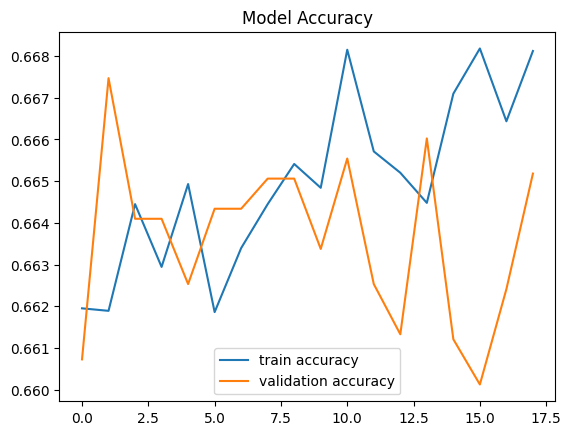

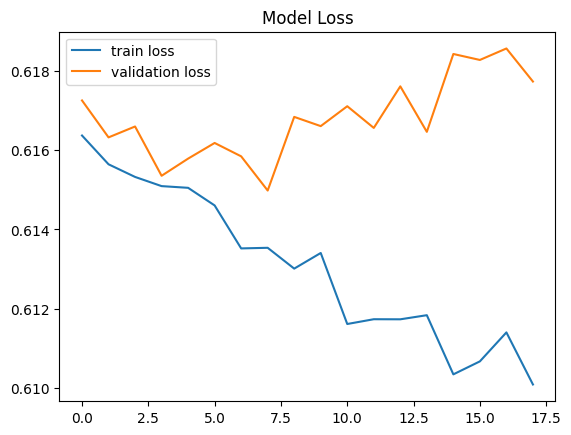

In [611]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(model_history.history['accuracy'], label='train accuracy')
plt.plot(model_history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [612]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


2394/2394 [==============================] - 2s 658us/step - loss: 0.6055 - accuracy: 0.6736
Test Accuracy: 0.6736


In [617]:
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

2394/2394 [==============================] - 1s 579us/step


In [619]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[45820 21889]
 [ 3115  5781]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67709
           1       0.21      0.65      0.32      8896

    accuracy                           0.67     76605
   macro avg       0.57      0.66      0.55     76605
weighted avg       0.85      0.67      0.73     76605



🔍 What This Means
The model is very precise for class 0 (Non-Defaults) but struggles to correctly identify class 1 (Defaults).

Recall for class 1 is 65%, meaning you catch many of the defaulters, but precision is low — many false positives.

⚠️ Problem: Imbalance Impact
Even though we balanced data with undersampling, this is still a class imbalance problem in behavior.